# Bus Analytics Toolkit for Bus Bunching Mitigation

# Bus Simulator Sandbox
## Yuwen Chang

# I. Data Pipeline
## 1. Vehicle Data
### 1a. Real-time Data Query
### 1b. Historical Sample Data

## 2. Route Data
### 2a. CallDistanceAlongRoute
### 2b. Query from GTFS Data
### 2c. Shapefile

# II. Dashboard
## 1. Time-space Diagram
## 2. Route Topology
## 3. Plain Line
## 4. Basemap
## 5. Analytics

# III. Simulator
## 1. Objects
### 1a. Bus
### 1b. Stop
## 2. Parameters
## 3. Inputs
## 4. Display
## 5. Analytics

![](figtab/str.png)

In [1]:
# import packages
from __future__ import print_function, division
from IPython.display import display, clear_output, Image

import os
import sys
import json
import ast

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import fiona
import folium
import geopandas as gpd
import mplleaflet as mlf
from shapely.geometry import Point

import time
import calendar
from datetime import datetime

import collections
from collections import defaultdict

import scipy.stats as ss

try:
    import urllib2 as urllib
    from urllib2 import HTTPError
    from urllib2 import urlopen
    from urllib import urlencode
    from StringIO import StringIO as io

except ImportError:
    import urllib.request as urllib
    from urllib.error import HTTPError
    from urllib.request import urlopen, Request
    from urllib.parse import urlencode
    from io import BytesIO as io

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Yuwen/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
import buskit as bk
from buskit import busdata as bdata
from buskit import dashboard as bdash
from buskit import simulator as bsim

# I. Data Pipeline
## 1. Vehicle Data
## 1a. Real-time Data Query
# APIKEY, ROUTE, DURATION

In [4]:
# get MTA API key
try:
    # for local running
    MTAAPI = os.getenv("MTAAPIKEY")
except:
    # for CUSP ADRF running only
    from APIs import MTAAPI
    MTAAPI = MTAAPI()

df = bdata.stream_bus(MTAAPI, "M1", 0.5)
# !python busdata.py $MTAAPIKEY "M1" 240


Time Elapsed: 0.0 min(s)
Bus Line: M1
Number of Active Buses: 18
Bus 1 (#MTA NYCT_6769) is at latitude 40.806131 and longitude -73.942468, heading for E VILLAGE 8 ST via 5 AV (direction: 1)
Bus 2 (#MTA NYCT_3902) is at latitude 40.810367 and longitude -73.937267, heading for HARLEM 147 ST via MADISON (direction: 0)
Bus 3 (#MTA NYCT_6762) is at latitude 40.755002 and longitude -73.979775, heading for E VILLAGE 8 ST via 5 AV (direction: 1)
Bus 4 (#MTA NYCT_6775) is at latitude 40.787046 and longitude -73.954294, heading for HARLEM 147 ST via MADISON (direction: 0)
Bus 5 (#MTA NYCT_6759) is at latitude 40.767515 and longitude -73.970642, heading for GRAND STREET via 5 AV/BROADWAY (direction: 1)
Bus 6 (#MTA NYCT_6751) is at latitude 40.725431 and longitude -73.996773, heading for GRAND STREET via 5 AV/BROADWAY (direction: 1)
Bus 7 (#MTA NYCT_3881) is at latitude 40.782276 and longitude -73.957779, heading for HARLEM 147 ST via MADISON (direction: 0)
Bus 8 (#MTA NYCT_6770) is at latitude 4

## 1b. Historical Sample Data
# M1-Tue-180410-154415-260.csv
### NOTE: file naming convention changed in new version

In [5]:
fname = "MTA_data/M1-Tue-180410-154415-260.csv"
df = pd.read_csv(fname)
df = bdata.df_process(df, 1)
df = bdata.df_addts(df)
df.head()

/Users/Yuwen/Dropbox/BusSimulator/buskit/buskit/busdata.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['VehDistAlongRoute'] = df['CallDistanceAlongRoute'] - df['DistanceFromCall']
/Users/Yuwen/Dropbox/BusSimulator/buskit/buskit/busdata.py:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  .dt.tz_convert('America/New_York')


,Unnamed: 0,Bearing,BlockRef,CallDistanceAlongRoute,DataFrameRef,DatedVehicleJourneyRef,DestinationName,DestinationRef,DirectionRef,DistanceFromCall,...,ProgressStatus,PublishedLineName,RecordedAtTime,StopPointName,StopPointRef,StopsFromCall,VehicleRef,VisitNumber,VehDistAlongRoute,ts
1,1,233.31764,MTA NYCT_OF_B8-Weekday-SDon_E_OF_52620_M7-205,7653.54,2018-04-10,MTA NYCT_OF_B8-Weekday-SDon-088000_M7_205,E VILLAGE 8 ST via 5 AV,MTA_403793,1,0.00,...,NaN,M1,2018-04-10 15:44:02-04:00,5 AV/W 59 ST,MTA_400512,0,MTA NYCT_6764,1,7653.54,0
2,2,49.23225,MTA NYCT_OF_B8-Weekday-SDon_E_OF_50340_M1-139,13730.36,2018-04-10,MTA NYCT_OF_B8-Weekday-SDon-084200_M1_139,GRAND STREET via 5 AV/BROADWAY,MTA_803192,1,6.76,...,layover,M1,2018-04-10 15:44:10-04:00,CENTRE ST/BROOME ST,MTA_803192,0,MTA NYCT_6748,1,13723.60,0
3,3,233.78738,MTA NYCT_OF_B8-Weekday-SDon_E_OF_55860_M1-149,1270.21,2018-04-10,MTA NYCT_OF_B8-Weekday-SDon-093400_M1_149,GRAND STREET via 5 AV/BROADWAY,MTA_803192,1,9.06,...,NaN,M1,2018-04-10 15:43:47-04:00,5 AV/W 135 ST,MTA_400094,0,MTA NYCT_6759,1,1261.15,0
4,4,234.06093,MTA NYCT_OF_B8-Weekday-SDon_E_OF_51900_M1-141,9963.37,2018-04-10,MTA NYCT_OF_B8-Weekday-SDon-086800_M1_141,GRAND STREET via 5 AV/BROADWAY,MTA_803192,1,14.94,...,NaN,M1,2018-04-10 15:43:45-04:00,5 AV/W 31 ST,MTA_400325,0,MTA NYCT_6773,1,9948.43,0
6,6,233.75938,MTA NYCT_OF_B8-Weekday-SDon_E_OF_29580_M1-123,4506.30,2018-04-10,MTA NYCT_OF_B8-Weekday-SDon-091900_M1_147,GRAND STREET via 5 AV/BROADWAY,MTA_803192,1,21.44,...,NaN,M1,2018-04-10 15:43:55-04:00,5 AV/EAST 98 ST,MTA_404081,0,MTA NYCT_6778,1,4484.86,0


In [6]:
df = bdata.split_trips(df)

/Users/Yuwen/anaconda/lib/python3.6/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


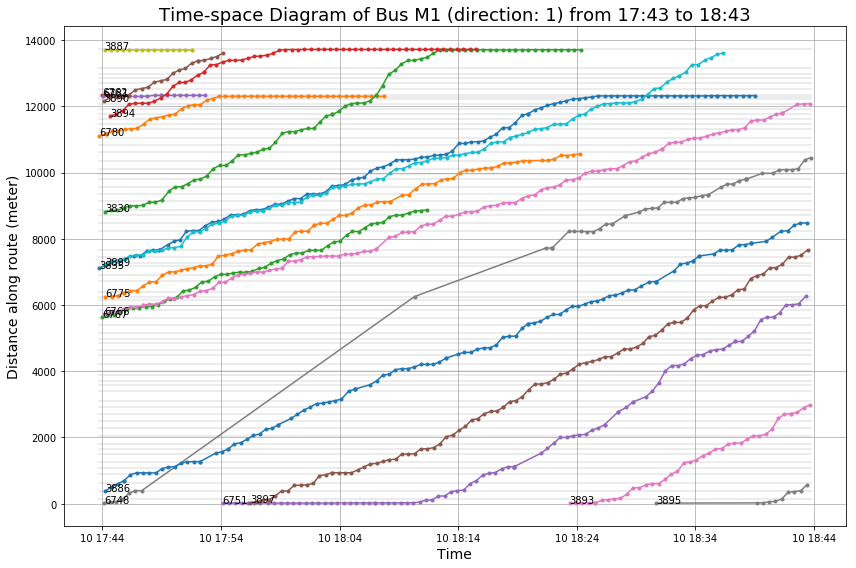

(<matplotlib.figure.Figure at 0x113c6a278>,
 <matplotlib.axes._subplots.AxesSubplot at 0x114071160>)

In [8]:
bdata.plot_tsd(df, 1, 120, 180)

## 2. Route Data
- METHOD 1: Subset and sort built-in data using CallDistanceAlongRoute in df
- METHOD 2: Query latest GTFS data through online database
- METHOD 3: Use up-to-date shapefile, read as gpd and query

## 2a. CallDistanceAlongRoute
Caveat: only available when there is at least one complete run in the data (can be combined by several buses)

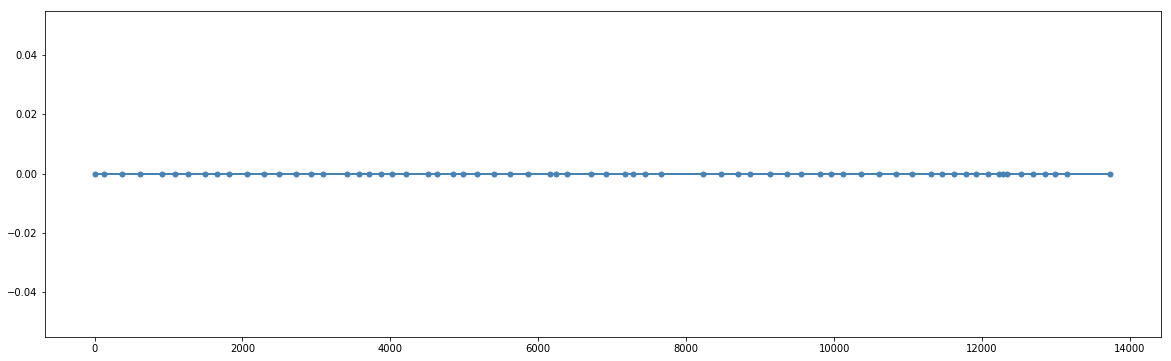

(<matplotlib.figure.Figure at 0x11276ef60>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1141ff278>)

In [9]:
bdata.plot_1D(df)

## 2b. Query from GTFS Data (to be switched to transitland.py)
Caveat: multiple routes and shapes for a bus line

## 2c. Shapefile
Caveat: currently, I haven't found a good source that provides official or reliable constant update, but if there is one, this one is probably the easiest way
### basemap=True to be fixed (# mlf.display())

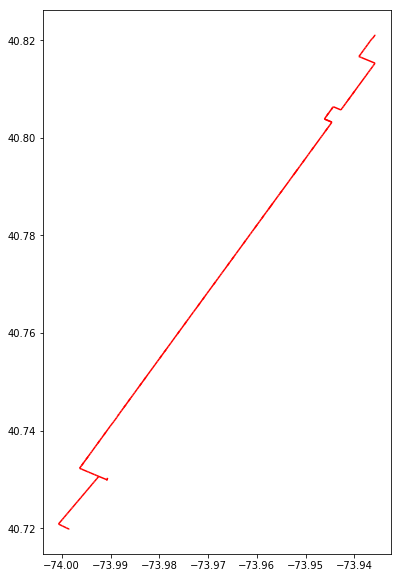

In [10]:
bdash.plot_2D(df)

# II. Dashboard
## 1. Time-space Diagram
## 2. Route Topology
## 3. Plain Line

Interrupted


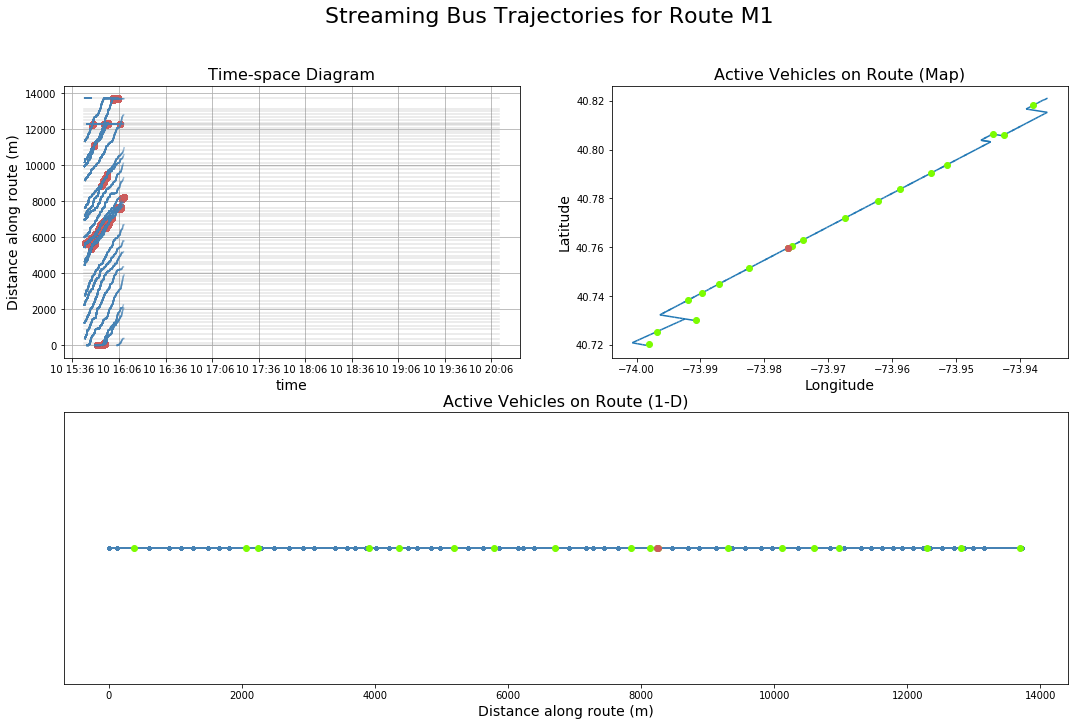

In [11]:
bdash.dash_hist(df)

## 4. Basemap

## 5. Analytics (approximate)
### Issues:
- drop duplicates may remove same vehicle if it had several runs during the period
- when is vehicle really at stop?
- do we capture every vehicle that pass by the stop?

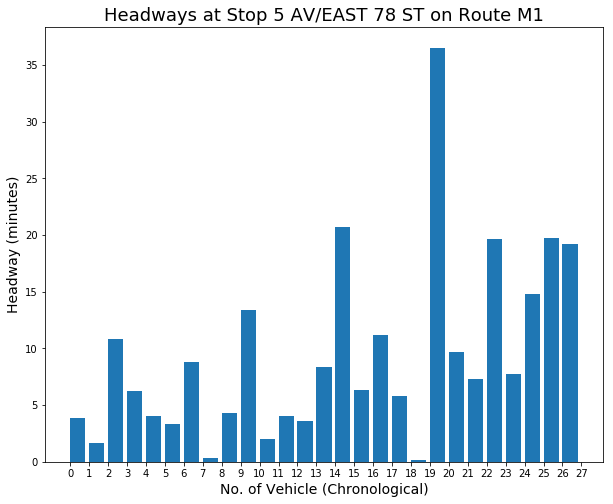

In [14]:
bdash.plot_headway(df, 30)

# III. Simulator

## 2. Parameters

In [15]:
# set parameters
time_coef = 100000 # simulation time is __ times faster than the reality
avg_door_t = 4 # assume opening and closing the door take 4 seconds in total
avg_board_t = 2 # assume each boarding takes 2 sec
avg_alight_t = 1 # assume each alight takes 1 sec

## 3. Inputs

In [16]:
# determine data source
beta = False

if beta:
    # artificial data   ### make this part automatized with given number of stop
    stop_ref = np.array([1, 2, 3, 4, 5, 6, 7])
    stop_pos = np.array([0, 100, 200, 300, 400, 500, 600])
    stop_name = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
    pax_hr_route = 2000
else:
    # historical data
    stop_ref, stop_pos, stop_name = bsim.read_data("MTA_data/M1-Tue-180410-154415-260.csv", 1)
    pax_hr_route = 13000

# speed and travel time data are currently artificial
link_vel = 1.5 * np.random.randn(len(stop_pos)) + 6 # make sure the unit is m/sec

# pax distribution
stop_pos_next = np.append(stop_pos, stop_pos[-1])[1:]

pos_mu = stop_pos.mean() # mean stop distance (not midpoint of route)
pos_std = stop_pos.std() # s.d. of stop distances
pax_norm = ss.norm(loc=pos_mu, scale=pos_std)
pax_perc = np.array([pax_norm.cdf(stop_pos_next[i]) - pax_norm.cdf(stop_pos[i]) for i in range(len(stop_pos))]) ### a temporary measure ###

pax_hr_stop = pax_hr_route * pax_perc # total amount passenger per hr at each stop
pax_at_stop = np.zeros(len(stop_pos))

## 1. Objects
## 1a. Bus

In [17]:
# Bus class
class Bus(object):
    
    capacity = 60
    seat = 40
    
    def __init__(self, ref, pos=0):
        self.ref = ref # vehicle reference
        self.pos = pos # vehicle location (1-D)
        self.link = np.sum(self.pos >= stop_pos) - 1 # link index starts from 0  ### unified with the formula in Stop Class
        self.vel = link_vel[self.link] # speed at current link
        self.next_stop = stop_pos[self.link + 1] # position of next stop
        self.dwell_t = 0
        self.pax = 0
        self.clock = 0
        self.operate = True
        self.atstop = False
        
        self.log_pos = [self.pos]
        self.log_vel = [self.vel]
        self.log_pax = [0]
        self.log_dwell = [0]

    def terminal(self):
        print("The bus has reached the terminal")
        self.operate = False
        self.vel = 0
        self.pax = 0
        
    def stop(self):
        print("Bus %s is making a stop at %s (position %i)"%(self.ref, stop_name[self.link + 1], self.next_stop))
        self.atstop = True
        self.pax_to_board = pax_at_stop[self.link + 1] # check how many pax at stop
        self.board_t = self.pax_to_board * avg_board_t
        self.alight_t = 0 * avg_alight_t  #### TO DEVELOP
        self.dwell_t = avg_door_t + self.alight_t + self.board_t # supposed to dwell for this long
        self.clock += 1

#         self.vel = 0
#         self.pos += self.vel
        self.record()

    def move(self):
        pax_at_stop[self.link + 1] = 0 # clear all pax at stop
        self.log_dwell.append(self.dwell_t)
        # move on!
        self.atstop = False
        self.dwell_t = 0
        self.clock = 0
        self.link += 1
        self.pax = 0 # update pax onboard ###################
        self.record()
        self.vel = link_vel[self.link] # new link speed
        self.next_stop = stop_pos[self.link + 1] # new next stop

    def record(self):
        self.log_pos.append(self.pos)
        self.log_pax.append(self.pax)
        
    def proceed(self):
        if self.operate:
            if self.pos + self.vel >= stop_pos[-1]:
                self.terminal()
            elif self.pos + self.vel >= self.next_stop:  ### this judgement restricts from recording vel as 0 at stop, change to sth else
                self.stop()
                if self.clock >= self.dwell_t:
                    self.move()
            else:
                print("Current position of bus %s: %i"%(self.ref, self.pos))
                self.pos += self.vel
                self.record()
        else:
            print("Bus %s is not operating."%(self.ref))

## 1b. Stop

In [18]:
class Stop(object):
    
    pos_mu = stop_pos.mean()
    pos_std = stop_pos.std()
    pos_len = np.diff(stop_pos) # segment length starting from link 0

    def __init__(self, i):
        self.ref = stop_ref[i] # stop reference
        self.pos = stop_pos[i] # stop location (1-D)
        self.name = stop_name[i] # stop name
        self.link = i # the link (index from 0) that the stop belongs to
#         self.link = list(stop_ref).index(self.ref) # link index starts from 0
        self.pax = 0
        self.first = self.pos == stop_pos[0]
        self.last = self.pos == stop_pos[-1]
        self.clock = 0
        self.log_pax = [0]
        self.log_wait_t = [0]
#        self.log_msg = []
#        self.log_spacing

    def new_pax(self): # randomly generate new pax each second
        # future function, also consider bus frequency to determine arrival distribution
        # frequent services tend to have uniform arrivals
        return int(np.random.poisson(lam=(pax_hr_stop[self.link]/3600), size=1))  # lambda = (avg pax/hr) / sec
    
    def update(self):
        self.clock += 1
        self.pax += self.new_pax()
        pax_at_stop[self.link] = self.pax # update global listing of pax at each stop
        return self.pax

    def record(self):
        self.log_pax.append(self.pax)

    def proceed(self):
        if pax_at_stop[self.link] < self.pax: # if pax are cleared by a bus
            self.pax = pax_at_stop[self.link] # reverse update
            self.log_wait_t.append(self.clock)
            self.clock = 0

        self.update()
        self.record()

## 4. Display

In [19]:
# generate stops
# generate buses

if beta:
    stop1 = Stop(0)
    stop2 = Stop(1)
    stop3 = Stop(2)
    stop4 = Stop(3)
    stop5 = Stop(4)
    stop6 = Stop(5)
    stop7 = Stop(6)
    stops = [stop1, stop2, stop3, stop4,
             stop5, stop6, stop7]
    
    bus1 = Bus('7609', 0)
    bus2 = Bus('7828', 250)
    bus3 = Bus('7964', 450)
    buses = [bus1, bus2, bus3]
    
else:
    d={}
    for i in range(len(stop_pos)):
        d["stop%s"%(i)] = Stop(i)
    
    bus1 = Bus('7609', 0)
    bus2 = Bus('7828', 1200)
    bus3 = Bus('7964', 2900)
    bus4 = Bus('9829', 3500)
    bus5 = Bus('7361', 4050)
    bus6 = Bus('9999', 5600)
    bus7 = Bus('3283', 6100)
    bus8 = Bus('1281', 6900)
    bus9 = Bus('2345', 7800)
    bus10 = Bus('9811', 9500)
    
    buses = [bus1, bus2, bus3, bus4, bus5,
             bus6, bus7, bus8, bus9, bus10]

In [20]:
# simulate with historical data
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

### FLATTEN THE CODE HERE!!! ###
ax.plot(stop_pos, np.zeros(len(stop_pos)), '.-')

veh1, = ax.plot(bus1.pos, 0, '*', markersize=16)
veh2, = ax.plot(bus2.pos, 0, '*', markersize=16)
veh3, = ax.plot(bus3.pos, 0, '*', markersize=16)
veh4, = ax.plot(bus4.pos, 0, '*', markersize=16)
veh5, = ax.plot(bus5.pos, 0, '*', markersize=16)
veh6, = ax.plot(bus6.pos, 0, '*', markersize=16)
veh7, = ax.plot(bus7.pos, 0, '*', markersize=16)
veh8, = ax.plot(bus8.pos, 0, '*', markersize=16)
veh9, = ax.plot(bus9.pos, 0, '*', markersize=16)
veh10, = ax.plot(bus10.pos, 0, '*', markersize=16)


# for s in range(len(stop_pos)):
#     ax.plot([stop_pos[s], stop_pos[s]], [0, pax_at_stop[s]], '-', color='indianred')

pax_bar = plt.bar(stop_pos, pax_at_stop, width=100, align='center', color='indianred', alpha=0.5)

#ax.set_yticks([])
ax.set_title('Simulation using Artificial Data', fontsize=20)
ax.set_xlabel('Distance along route M1', fontsize=16)
ax.set_ylabel('Pax at Stop', fontsize=16)
ax.set_ylim(-1, 60)

clock = 0

while bus1.operate:
#     [s.proceed() for s in stops]
    [s.proceed() for s in d.values()]
    [b.proceed() for b in buses]

    veh1.set_xdata(bus1.pos)
    veh2.set_xdata(bus2.pos)
    veh3.set_xdata(bus3.pos)
    veh4.set_xdata(bus4.pos)
    veh5.set_xdata(bus5.pos)
    veh6.set_xdata(bus6.pos)
    veh7.set_xdata(bus7.pos)
    veh8.set_xdata(bus8.pos)
    veh9.set_xdata(bus9.pos)
    veh10.set_xdata(bus10.pos)

    for px, h in zip(pax_bar, pax_at_stop):
        px.set_height(h)

#     pax.set_data(stop_pos, pax_at_stop)
#     for s in range(len(stop_pos)):
#         ax.plot([stop_pos[s], stop_pos[s]], [0, pax_at_stop[s]], '-', color='indianred')
        
    clear_output(wait=True)
    display(fig)
    clock += 1
    print("Time elapsed: %i seconds"%(clock))
    print("Pax at each stop: ", pax_at_stop)
    time.sleep(1/10000) # set a global time equivalent parameter

KeyboardInterrupt: 

KeyError: (10000.0, 0.0, '10000', 'k', 'top', 'center', 7475460610033614400, None, None, 72.0, <weakref at 0x1176f0cc8; dead>, 1.2)

## 5. Analytics

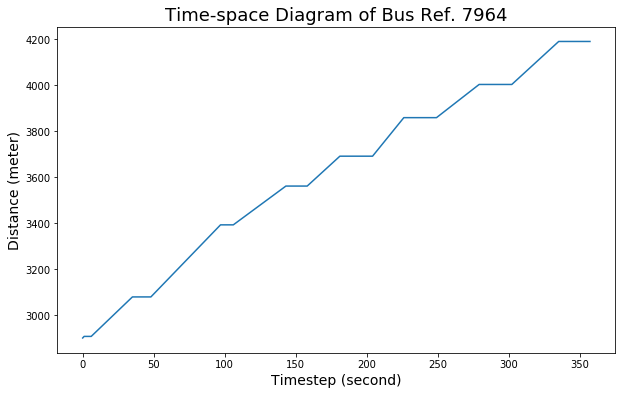

In [24]:
bsim.bus_tsd(bus3)

In [25]:
d['stop19'].log_wait_t

[0, 78, 165]

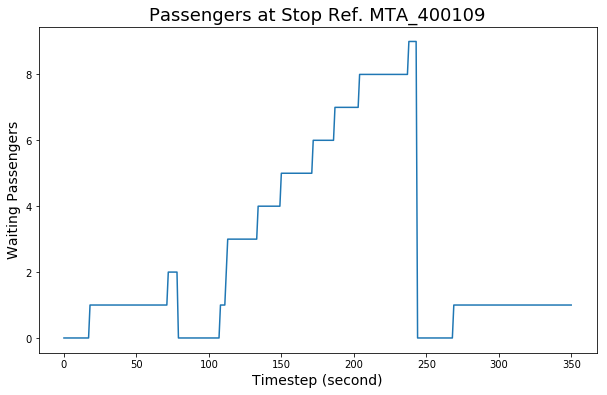

In [26]:
bsim.stop_pax(d['stop19'])

In [ ]:
# trace log

## IV. Platform and Package Deployment
on web
1. Control panel
2. Real-time info on Google basemap
3. Real-time info on straightened route topology
    - 3a. BB indicator
4. Dynamic time-space diagram

# End

- 3/11 4
- 3/12 1.5
- 3/16 1
- 3/17 2
- 3/18 2
- 3/20 1.5
- 3/23 2
- 4/3 3
- 4/5 0.5
- 4/6 1.5
- 4/9 1.5
- 4/21 9
- 4/22 9
- 4/23 1
- 4/24 1.5
- 4/25 1.5
- 4/26 5.5
- 4/27 0.5
- 4/29 1.5

In [64]:
def realtime(apikey, route, df):
    """
    bus_data function adapted for in-notebook real-time monitoring use
    """
    url = "http://bustime.mta.info/api/siri/vehicle-monitoring.json?key=%s&VehicleMonitoringDetailLevel=calls&LineRef=%s"%(apikey, route)
    
    # fetch data through MTA API
    response = urllib.urlopen(url)
    data = response.read().decode("utf-8")
    data = json.loads(data)

    # check if bus route exists
    try:
        data2 = data['Siri']['ServiceDelivery']['VehicleMonitoringDelivery'][0]['VehicleActivity']
    # print error if bus route not found
    except:
        error = data['Siri']['ServiceDelivery']['VehicleMonitoringDelivery'][0]['ErrorCondition']
        print(error['Description'])

    # print info of the current query request
#     print("Bus Line: " + route)
#     print("Number of Active Buses: " + str(len(data2)))

    # parse the data of each active vehicle
    for i, v in enumerate(data2):
        #if 'OnwardCall' in v['MonitoredVehicleJourney']['OnwardCalls']:
        try:
            # map variables
            dict1 = flatten(v['MonitoredVehicleJourney'])
            dict1['RecordedAtTime'] = v['RecordedAtTime']
            #dict1['SituationSimpleRef'] = dict1['SituationRef'][0]['SituationSimpleRef']
            dict1.pop('SituationRef')
            dict1.pop('OnwardCall')

            # print info of the vehicle
#             print("Bus %s (#%s) is at latitude %s and longitude %s"%(i+1, dict1['VehicleRef'], dict1['Latitude'], dict1['Longitude']))

            # write data to dictionary
            df_new = pd.DataFrame(dict1, index=[i])
            df = pd.concat([df, df_new])

        except Exception as e:
            print("Error: %s"%(e))
            pass
            
    df.to_csv("realtime.csv")
    return df, df_new

In [65]:
def df_update(apikey, route, direction):
    """ Append new data to existing csv file and return both all and new dfs"""
    try:
        df = pd.read_csv("realtime.csv")
    except:
        print("realtime.csv not found, creating new empty df")
        df = pd.DataFrame()
    df, df_new = realtime(apikey, route, df)
    
    # process variables for plotting
    df = df_process(df, direction)
    df_new = df_process(df_new, direction)
    
    return df, df_new

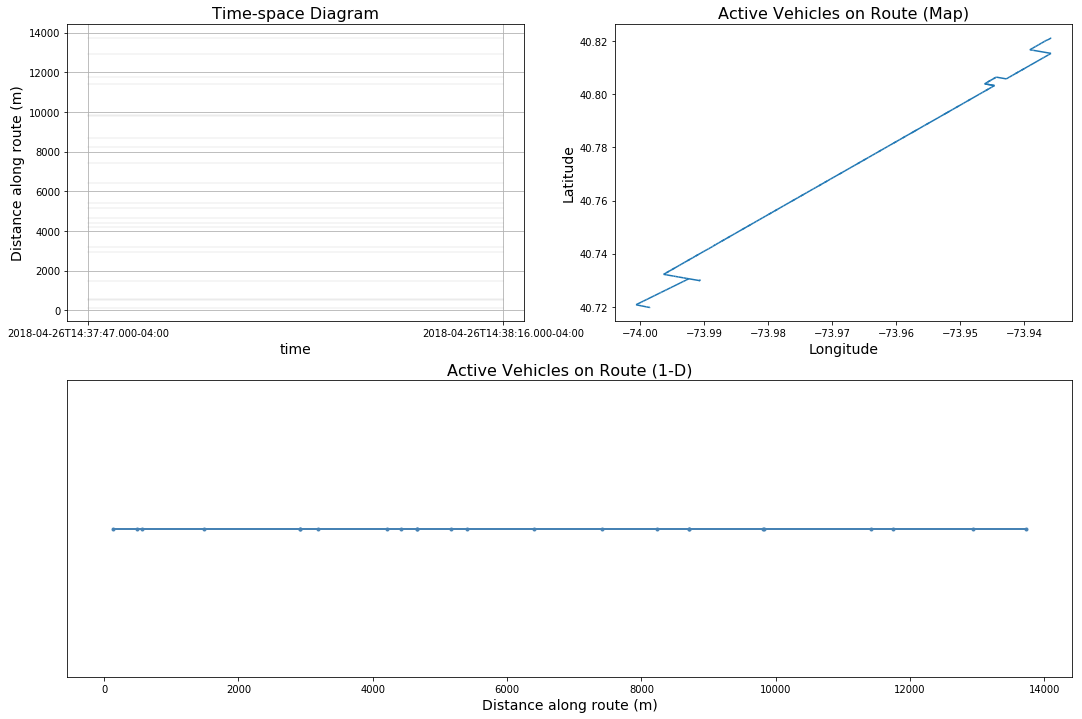

Seconds elapsed: 120


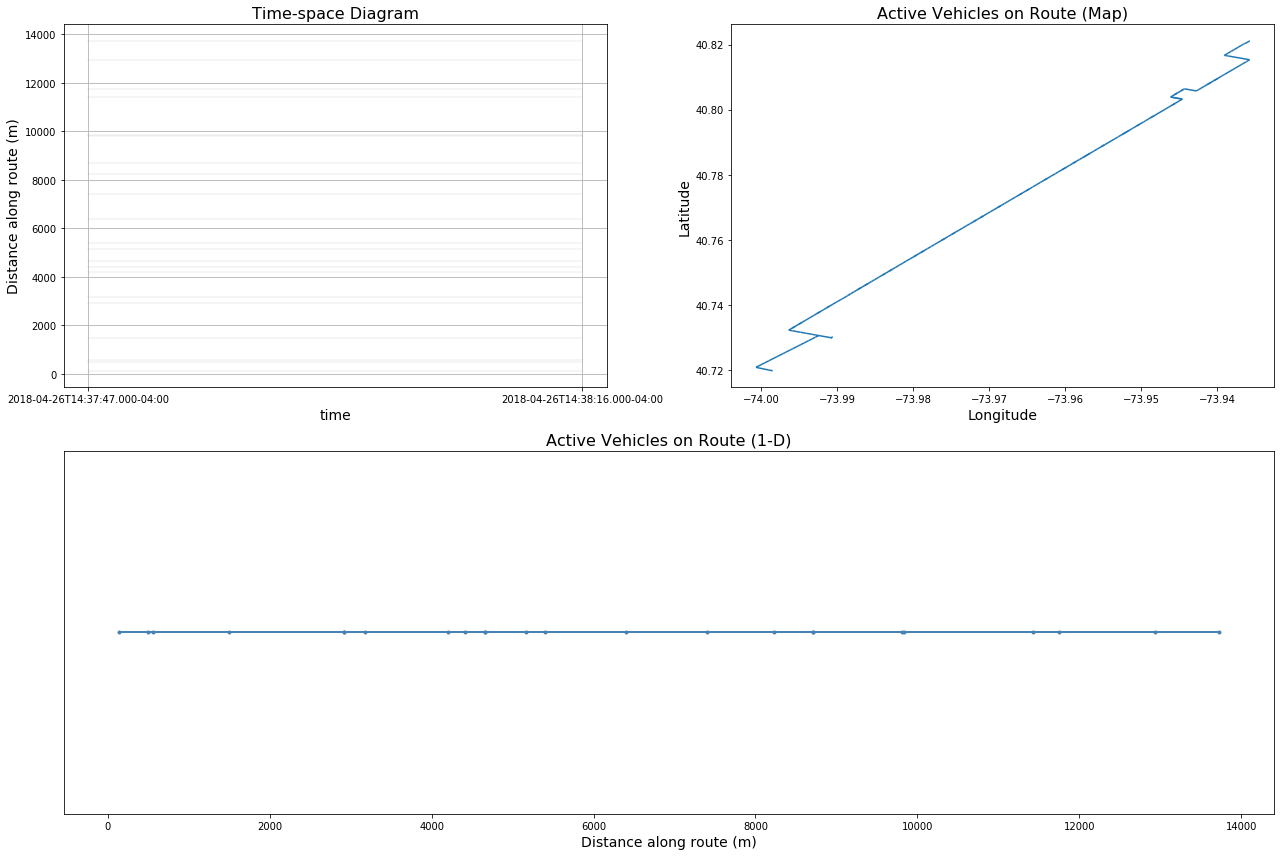

In [73]:
# specify line and direction query
lineref = 'M1'
direction = 1

df = pd.DataFrame()
df, df_new = realtime(MTAAPI, lineref, df)
route_shp = gdf[gdf['route_dir'] == '%s_%s'%(lineref, direction)]

clock = 0

# plot figure
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

# plot CallDistanceAlongRoute (bus stops)
[ax1.plot([df['RecordedAtTime'].min(), df['RecordedAtTime'].max()], [i, i], color='gray', alpha=0.1) for i in df['CallDistanceAlongRoute'].unique()]
p1, = ax1.plot([], [], '-', color='steelblue')

ax1.grid()
ax1.set_xlabel("time", fontsize=14)
ax1.set_ylabel("Distance along route (m)", fontsize=14)
ax1.set_title("Time-space Diagram", fontsize=16)

# plot route shape on map (2-D)
route_shp.plot(ax=ax2)
p7, = ax2.plot([], [], 'o', color='lawngreen')
p2, = ax2.plot([], [], 'o', color='indianred')

ax2.set_ylabel("Latitude", fontsize=14)
ax2.set_xlabel("Longitude", fontsize=14)
ax2.set_title("Active Vehicles on Route (Map)", fontsize=16)

# plot dynamic route line (1-D)
ax3.plot(df['CallDistanceAlongRoute'], [0]*len(df), '.-', color='steelblue')
p3, = ax3.plot([], [], 'o', color='lawngreen')
p4, = ax3.plot([], [], 'o', color='indianred')

ax3.set_yticks([])
ax3.set_xlabel("Distance along route (m)", fontsize=14)
ax3.set_title("Active Vehicles on Route (1-D)", fontsize=16)

# update
while clock <= 120:
    df1, df3 = df_update(MTAAPI, lineref, direction)
    
    # mark vehicles that are bunching
    ##### APPEND THIS TRY EXCEPT BACK TO HISTORICAL RUN #####
    ##### OTHERWISE ERROR WHEN THERE IS NO BUNCHING #####
    try:
        df3.sort_values(['VehDistAlongRoute'], inplace=True)
        spacing = np.diff(df3['VehDistAlongRoute'])
        bunch = spacing < 100 # set threshold (meters) to be identified as BB
        bunch_a = np.array([False] + list(bunch))
        bunch_b = np.array(list(bunch) + [False])
        bunch = bunch_a + bunch_b
        bb_df = df3[bunch]
    except:
        pass
    
#     # plot TSD for each vehicle
#     for i, v in enumerate(df1['VehicleRef'].unique()):
#         # subset data for single vehicle
#         veh_df = df1[df1['VehicleRef'] == v]
#         ax1.plot(veh_df['RecordedAtTime'], veh_df['VehDistAlongRoute'], '-', color='steelblue', alpha=0.5)
#         try:
#             ax1.plot(bb_df['RecordedAtTime'], bb_df['VehDistAlongRoute'], 'o', color='indianred', alpha=0.5)
#         except:
#             pass
#         #ax1.annotate('%s'%v.split("_")[1], (list(veh_df['RecordedAtTime'])[0],list(veh_df['VehDistAlongRoute'])[0]))

    p7.set_data(df3['Longitude'], df3['Latitude'])
    p3.set_data(df3['VehDistAlongRoute'], [0]*len(df3))
    
    try:
        p2.set_data(bb_df['Longitude'], bb_df['Latitude'])
        p4.set_data(bb_df['VehDistAlongRoute'], [0]*len(bb_df))
    except:
        pass
    
    clear_output(wait=True)
    display(fig)
    print("Seconds elapsed: %s"%(clock))
    clock += 30
    time.sleep(30)
    
plt.tight_layout()
plt.show()

NameError: name 'stops' is not defined

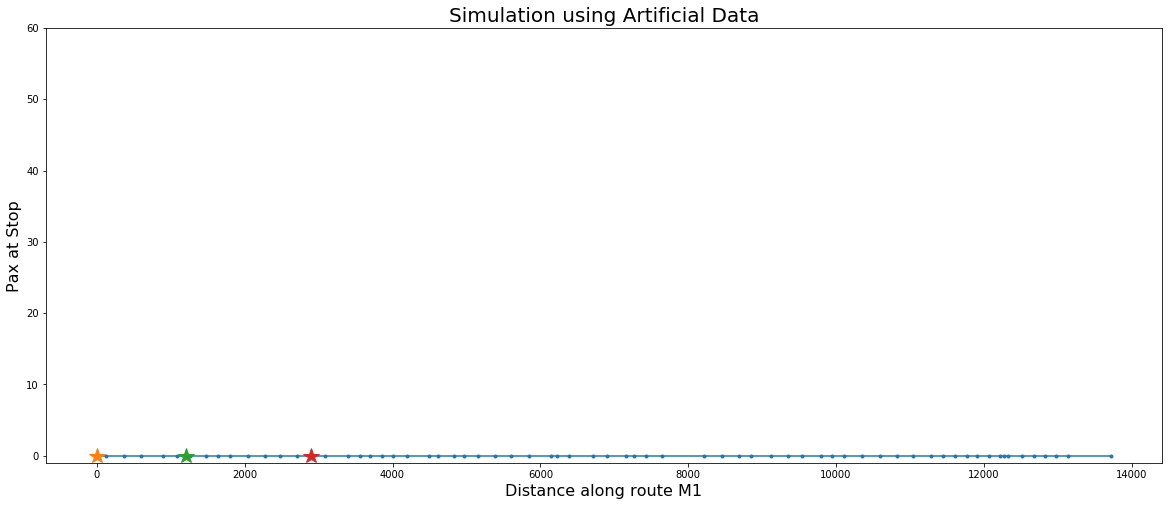

In [32]:
# simulate with artificial data
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

### FLATTEN THE CODE HERE!!! ###
ax.plot(stop_pos, np.zeros(len(stop_pos)), '.-')

veh1, = ax.plot(bus1.pos, 0, '*', markersize=16)
veh2, = ax.plot(bus2.pos, 0, '*', markersize=16)
veh3, = ax.plot(bus3.pos, 0, '*', markersize=16)

pax_bar = plt.bar(stop_pos, pax_at_stop, width=10, align='center', color='indianred', alpha=0.5)

ax.set_title('Simulation using Artificial Data', fontsize=20)
ax.set_xlabel('Distance along route M1', fontsize=16)
ax.set_ylabel('Pax at Stop', fontsize=16)
ax.set_ylim(-1, 60)

clock = 0

while bus1.operate:
    [s.proceed() for s in stops]
#    [s.proceed() for s in d.values()]
    [b.proceed() for b in buses]

    veh1.set_xdata(bus1.pos)
    veh2.set_xdata(bus2.pos)
    veh3.set_xdata(bus3.pos)

    for px, h in zip(pax_bar, pax_at_stop):
        px.set_height(h)

#     pax.set_data(stop_pos, pax_at_stop)
#     for s in range(len(stop_pos)):
#         ax.plot([stop_pos[s], stop_pos[s]], [0, pax_at_stop[s]], '-', color='indianred')
        
    clear_output(wait=True)
    display(fig)
    clock += 1
    print("Time elapsed: %i seconds"%(clock))
    print("Pax at each stop: ", pax_at_stop)
    time.sleep(1/100) # set a global time equivalent parameter

In [16]:
# import osmnx as ox
# import networkx as nx
# import geopandas as gpd
# from collections import Counter

# from geopy import Nominatim
# from geopy.distance import vincenty
# from shapely.geometry import Point

In [45]:
import gmaps
gmaps.configure(api_key=os.getenv("GOOGLEAPIKEY"))

df_gmap = df[df['ts'] == 0]
location = list(zip(df_gmap['Latitude'], df_gmap['Longitude']))

fig = gmaps.figure()
fig.add_layer(gmaps.symbol_layer(location))
fig

In [46]:
# calculate stop distances
dist = []
lats = list(B54_merge['stop_lat'])
lons = list(B54_merge['stop_lon'])
for i in arange(len(B54_stops)):
    if i < len(B54_stops) - 1:
        p1 = lats[i], lons[i]
        p2 = lats[i+1], lons[i+1]
        di = vincenty(p1, p2).meters
        dist.append(di)
dist

[164.10592592573394,
 524.6821220855292,
 183.2864635647531,
 166.04481363027242,
 168.16662072005468,
 249.32389728515443,
 280.8678932398275,
 65.1613773786362,
 162.277246106055,
 160.8227222138864,
 156.99423276306914,
 177.8182272706027,
 262.3958689692586,
 186.7201549309188,
 134.44950499065496,
 113.44836241741916,
 271.7303956584878,
 243.00538513176005,
 292.5054493596941,
 190.84614888127206,
 295.74318979161654,
 180.16350288585392,
 297.9947729558094,
 205.45446314960742,
 168.5189134674809,
 151.1404164049675,
 170.5531370778554,
 218.34221496184352,
 226.21779839123397,
 226.0960471262775,
 374.39793393469455,
 130.71672370770722]

In [51]:
# calculate stop distances along the route (cumulative distance)
di = 0
cum_dist = [0]
for d in dist[:-1]:
    di += d
    cum_dist.append(di)
cum_dist = np.array(cum_dist)
cum_dist

array([   0.        ,  164.10592593,  688.78804801,  872.07451158,
       1038.11932521, 1206.28594593, 1455.60984321, 1736.47773645,
       1801.63911383, 1963.91635994, 2124.73908215, 2281.73331491,
       2459.55154218, 2721.94741115, 2908.66756608, 3043.11707107,
       3156.56543349, 3428.29582915, 3671.30121428, 3963.80666364,
       4154.65281252, 4450.39600231, 4630.5595052 , 4928.55427816,
       5134.00874131, 5302.52765477, 5453.66807118, 5624.22120826,
       5842.56342322, 6068.78122161, 6294.87726874, 6669.27520267])

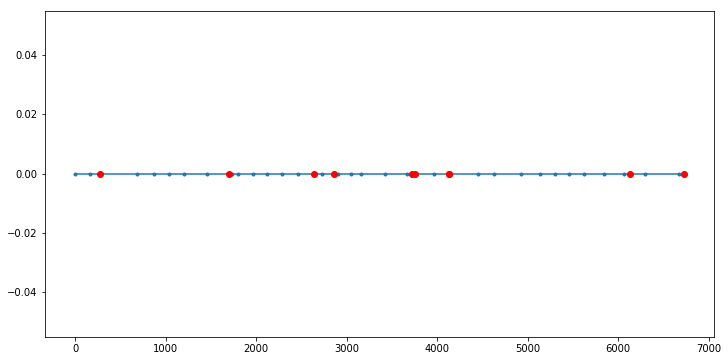

In [63]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.plot(cum_dist, [0]*len(cum_dist), '.-')
ax.plot(df['VehDistAlongRoute'], [0]*len(df), 'ro')
plt.show()

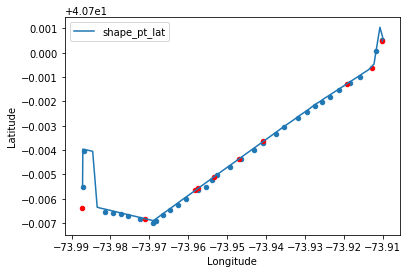

In [64]:
# plot route
ax = temp_shp.plot('shape_pt_lon', 'shape_pt_lat')

# plot stops
B54_stops.plot.scatter('stop_lon', 'stop_lat', ax=ax)

# plot active buses
df.plot.scatter('Longitude', 'Latitude', color='red', ax=ax)